## kaggle项目：员工离职预测分析

### 1. 探索性数据分析  Exploratory Data Analysis

In [1]:
# import data
import pandas as pd
df = pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
# look at the type of each column, good news: the data is clean
# rename some columns;and there are two columns which are object type
df.rename(columns = {'average_montly_hours':'average_monthly_hours','Work_accident':'work_accident','sales':'department'}, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# descriptive statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### 1.1  单因子分析 Single factor analysis

In [4]:
# satisfaction_level
# Skewness coefficient & Kurtosis coefficient
sl = df['satisfaction_level']
print(sl.skew(),sl.kurt())
import numpy as np
np.histogram(sl.values, bins = np.arange(0.0, 1.1, 0.1))

-0.4763603412839644 -0.6708586220574557


(array([ 195, 1214,  532,  974, 1668, 2146, 1972, 2074, 2220, 2004],
       dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [5]:
# last_evaluation
le = df['last_evaluation']
print(le.skew(),le.kurt())
np.histogram(le.values, bins = np.arange(0.3, 1.0, 0.1))

-0.02662174986376086 -1.2390402819304127


(array([ 179, 1389, 3395, 2234, 2313, 2814], dtype=int64),
 array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

In [6]:
# number_project
nump = df['number_project']
print(nump.skew(),nump.kurt())
print(nump.value_counts())
print(nump.value_counts(normalize = True).sort_values())

0.3377056123598222 -0.4954779519008947
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
7    0.017068
6    0.078272
2    0.159211
5    0.184079
3    0.270351
4    0.291019
Name: number_project, dtype: float64


In [7]:
# average_monthly_hours
amh = df['average_monthly_hours']
print(amh.skew(),amh.kurt())
print(np.histogram(amh.values, bins = np.arange(amh.min(), amh.max()+10, 10)))
# amh.value_counts(bins = np.arange(amh.min(), amh.max()+10, 10))

0.0528419894163242 -1.1349815681924558
(array([ 168,  171,  147,  807, 1153, 1234, 1072,  824,  818,  758,  751,
        738,  856,  824,  987, 1002, 1045,  935,  299,  193,  131,   86],
      dtype=int64), array([ 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216,
       226, 236, 246, 256, 266, 276, 286, 296, 306, 316], dtype=int64))


In [8]:
# time_spend_company
tsc = df['time_spend_company']
tsc.value_counts(normalize = True)

3     0.429562
2     0.216281
4     0.170478
5     0.098207
6     0.047870
10    0.014268
7     0.012534
8     0.010801
Name: time_spend_company, dtype: float64

In [9]:
# work_accident
wa = df['work_accident']
wa.value_counts(normalize = True)

0    0.85539
1    0.14461
Name: work_accident, dtype: float64

In [10]:
left = df['left']
left.value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [11]:
pl5 = df['promotion_last_5years']
pl5.value_counts(normalize = True)

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64

In [12]:
dept = df['department']
# dept.value_counts()
dept.value_counts(normalize = True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

In [13]:
salary = df['salary']
# print(salary.value_counts())
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'STXIHEI'

plt.bar(df['salary'].value_counts().index, df['salary'].value_counts())
plt.title('salary')
plt.xlabel('salary')
plt.show()
% matplotlib inline

<Figure size 640x480 with 1 Axes>

#### 1.2  多因子复合分析  Multivariate Compound Analysis

In [14]:
# 1. comparative analysis
df.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [15]:
# 2. cross analysis
import scipy.stats as ss
dp_indices = df.groupby('department').indices
sales_values = df['left'].iloc[dp_indices['sales']].values
tech_values = df['left'].iloc[dp_indices['technical']].values
# t test
ss.ttest_ind(sales_values, tech_values)

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)

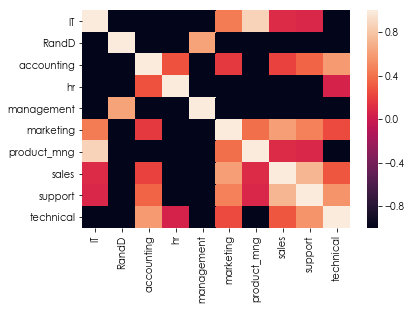

In [16]:
dp_keys = list(dp_indices.keys())
# establish a matrix
dp_t_mat = np.zeros([len(dp_keys),len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]].values,df['left'].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value < 0.05:
            dp_t_mat[i][j] = -1
        else:
            dp_t_mat[i][j] = p_value
# use a heat map to visualize result,a significant difference in the representation of black
sns.heatmap(dp_t_mat, xticklabels = dp_keys,yticklabels = dp_keys)
plt.show()

In [17]:
# PivotTable：focus on points with larger values
piv_tb = pd.pivot_table(df,values = 'left',
                        index = ['promotion_last_5years','salary'],
                       columns = ['work_accident'],aggfunc = np.mean)
print(piv_tb)

work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256


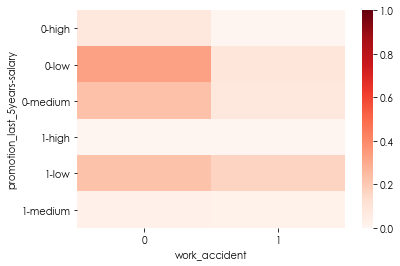

In [18]:
sns.set_context(font_scale = 1.5)
sns.heatmap(piv_tb,vmin = 0,vmax = 1,cmap = sns.color_palette('Reds',n_colors = 256))
plt.show()

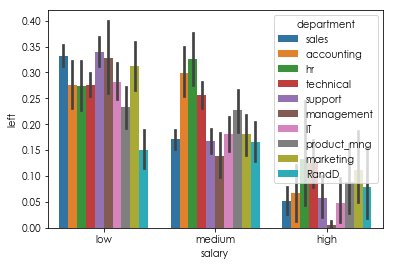

In [19]:
# 3. group analysis
sns.barplot(x = 'salary',y = 'left',hue = 'department',data = df)
plt.show()
# strong relationship between salary and left,such as marketing,sales

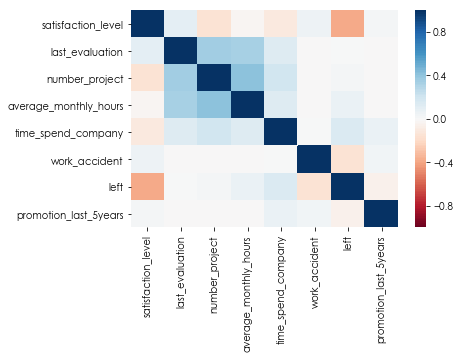

In [20]:
# 4. correlation analysis
# the blue part has obvious positive correlation.
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()

### 2. 特征工程  

In [22]:
# 1. data cleaning: the data is very clean
# 2. split labels
label = df['left']
df = df.drop('left',axis = 1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [23]:
# 3. Feature selection
# Reference to the heatmap in exploratory analysis,several attributes have little to do with left, and these attributes can be removed.
# But there aren't many attributes involved here, so keep them for the time being.
# 4. Feature preprocessing
# three methods: non-processing, normalization and standardization.
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

def preprocessing1(df,sl=False,le=False,npr=False,amh=False,tsc=False,wc=False,pl=False):
    scaler_lst = [sl,le,npr,amh,tsc,wc,pl]
    column_lst = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours',
                 'time_spend_company','work_accident','promotion_last_5years']
    for i in range(len(scaler_lst)):
        if not scaler_lst:
            df[column_lst[i]]=MinMaxScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]  
        else:
            df[column_lst[i]]=StandardScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]                     
    return df,label

In [27]:
# df,label = preprocessing1(df)

In [25]:
def map_salary(s):
    d = {'low':0,'medium':1,'high':2}
    # If not found, return 0. The default is low-income people.
    return d.get(s,0)  
def preprocessing2(df,sal=False,dept=False):
    scaler_lst2 = [sal,dept]
    column_lst2 = ['salary','department']
    for i in range(len(scaler_lst2)):
        if not scaler_lst2[i]:
            if column_lst2[i]=='salary':
                df[column_lst2[i]]=[map_salary(s) for s in df['salary'].values]
            else:
                df[column_lst2[i]]=LabelEncoder().fit_transform(df[column_lst2[i]])
            # Normalized or standardized processing
            df[column_lst2[i]]=MinMaxScaler().fit_transform(df[column_lst2[i]].values.reshape(-1,1)).reshape(1,-1)[0]    
        else:
            # Dummy quantization
            df=pd.get_dummies(df,columns=[column_lst2[i]],prefix = column_lst2[i],prefix_sep = '_')
    return df,label

In [26]:
df,label = preprocessing2(df,sal=True,dept=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0,0,1,0,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,0,1,0,0,0,0,0,0,0,0,1,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,0,1,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# Dimensional Reduction Function
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

def dimreduction(lower_d=False,ld_n=1):
    if lower_d: 
        return PCA(n_components=ld_n).fit_transform(df.values),label
dr = dimreduction(lower_d=True,ld_n=3)

### 3. 建模分析

In [32]:
# split train set and test set
from sklearn.model_selection import train_test_split

fv = df.values
lv = label.values
xtt,xvalidation,ytt,yvalidation = train_test_split(fv,lv,test_size=0.2)                    
xtrain,xtest,ytrain,ytest = train_test_split(xtt,ytt,test_size = 0.25)
print(len(xtrain),len(xvalidation),len(xtest),len(ytrain),len(yvalidation),len(ytest))

8999 3000 3000 8999 3000 3000


In [33]:
# 1. KNN
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
# set n_neighbors: 3 or 5 
knnclf_n3 = KNeighborsClassifier(n_neighbors=3)
knnclf_n5 = KNeighborsClassifier(n_neighbors=5)
knnclf_n3.fit(xtrain,ytrain)
knnclf_n5.fit(xtrain,ytrain)
ypred_n3 = knnclf_n3.predict(xvalidation)
ypred_n5 = knnclf_n5.predict(xvalidation)
print('accuracy:',accuracy_score(yvalidation,ypred_n3))
print('recall:',recall_score(yvalidation,ypred_n3))
print('f1-score:',f1_score(yvalidation,ypred_n3))

print('accuracy:',accuracy_score(yvalidation,ypred_n5))
print('recall:',recall_score(yvalidation,ypred_n5))
print('f1-score:',f1_score(yvalidation,ypred_n5))
# neighbors 3 is better than 5 most times 

accuracy: 0.947
recall: 0.927170868347339
f1-score: 0.8927848954821309
accuracy: 0.9466666666666667
recall: 0.9173669467787114
f1-score: 0.891156462585034


In [34]:
# save the model
from sklearn.externals import joblib
joblib.dump(knnclf_n3,'knnclf_n3')

['knnclf_n3']

In [35]:
# 2. Decision Tree
import pydotplus
# from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' 

featurenames = df.columns.values
Dtree = DecisionTreeClassifier()
Dtree.fit(xtrain,ytrain)
ypred_dt = Dtree.predict(xvalidation)
print('accuracy:',accuracy_score(yvalidation,ypred_dt))
print('recall:',recall_score(yvalidation,ypred_dt))
print('f1-score:',f1_score(yvalidation,ypred_dt))
dot_data = export_graphviz(Dtree,out_file=None,feature_names=featurenames,
                           class_names = ['NL','L'],
                           filled = True,
                           rounded = True,
                           special_characters = True)
# visualization
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('dt_tree.pdf')
# Decision tree is better than KNN

accuracy: 0.9763333333333334
recall: 0.9635854341736695
f1-score: 0.9509329647546649


True

In [51]:
# 3. Modeling function
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

def modeling(features,label):
    fv = features.values
    fn = features.columns.values  
    lv = label.values
    xtt,xvalidation,ytt,yvalidation = train_test_split(fv,lv,test_size=0.2)                    
    xtrain,xtest,ytrain,ytest = train_test_split(xtt,ytt,test_size = 0.25)
    print(len(xtrain),len(ytrain),len(xvalidation),len(yvalidation),len(xtest),len(ytest))
    
    models = []
    models.append(('KNN',KNeighborsClassifier(n_neighbors=3)))
    models.append(('DtreeGini',DecisionTreeClassifier()))
    models.append(('DtreeEntropy',DecisionTreeClassifier(criterion='entropy')))
    # models.append(('SVM',SVC()))  # calculation speed is relatively slow
    # models.append(('GaussianNB',GaussianNB()))
    # models.append(('BernoulliNB',BernoulliNB())) # not ideal
    models.append(('ANN',MLPClassifier(activation='logistic',hidden_layer_sizes=(5,5),solver='lbfgs',random_state=1)))
    models.append(('RF',RandomForestClassifier()))  # max_features = None,n_estimators= 50
    models.append(('Adaboost',AdaBoostClassifier())) 
    # models.append(('logisticsR',LogisticRegression()))# not ideal
    # models.append(('GBDT',GradientBoostingClassifier(max_depth = 6,n_estimators = 100)))
    
    for clfname,clf in models:
        clf.fit(xtrain,ytrain)
        xy_lst = [(xtrain,ytrain),(xvalidation,yvalidation),(xtest,ytest)] 
        for i in range(len(xy_lst)):
            xpart = xy_lst[i][0]
            ypart = xy_lst[i][1]
            ypred = clf.predict(xpart)
            print('set:',i)
            print(clfname,'-ACC:',accuracy_score(ypart,ypred))
            print(clfname,'-REC:',recall_score(ypart,ypred))
            print(clfname,'-F1:',f1_score(ypart,ypred))
modeling(df,label)

8999 8999 3000 3000 3000 3000
set: 0
KNN -ACC: 0.9715523947105233
KNN -REC: 0.9593721144967683
KNN -F1: 0.9419764279238442
set: 1
KNN -ACC: 0.9486666666666667
KNN -REC: 0.9283582089552239
KNN -F1: 0.8898426323319027
set: 2
KNN -ACC: 0.9473333333333334
KNN -REC: 0.9238095238095239
KNN -F1: 0.895778364116095
set: 0
DtreeGini -ACC: 1.0
DtreeGini -REC: 1.0
DtreeGini -F1: 1.0
set: 1
DtreeGini -ACC: 0.9726666666666667
DtreeGini -REC: 0.9611940298507463
DtreeGini -F1: 0.9401459854014599
set: 2
DtreeGini -ACC: 0.976
DtreeGini -REC: 0.9687074829931973
DtreeGini -F1: 0.9518716577540106
set: 0
DtreeEntropy -ACC: 1.0
DtreeEntropy -REC: 1.0
DtreeEntropy -F1: 1.0
set: 1
DtreeEntropy -ACC: 0.975
DtreeEntropy -REC: 0.9656716417910448
DtreeEntropy -F1: 0.9452154857560262
set: 2
DtreeEntropy -ACC: 0.9766666666666667
DtreeEntropy -REC: 0.9714285714285714
DtreeEntropy -F1: 0.9532710280373832
set: 0
ANN -ACC: 0.9633292588065341
ANN -REC: 0.9141274238227147
ANN -F1: 0.9230769230769231
set: 1
ANN -ACC: 0.957